<a href="https://colab.research.google.com/github/JavZon/Machine_Learning/blob/main/MinMax_and_StandardScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [3]:
URL ="https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45)


In [5]:
bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf]
labels=[1,2,3,4,5]
df['cat']=pd.cut(df['median_income'], bins=bins, labels=labels)

In [7]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5


In [10]:
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45)

for train_index, test_index in sss.split(df,df['cat']):
  train_df=df.loc[train_index]
  test_df=df.loc[test_index]

In [13]:
train_df.drop(columns='cat', inplace=True)

In [14]:
test_df.drop(columns='cat', inplace=True)

In [16]:
housing=train_df.drop(columns='median_house_value')
housing_labels=train_df['median_house_value'].copy()
train_df.drop(columns='median_house_value', inplace=True)

In [20]:
train_df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16908,-122.37,37.58,34.0,2697.0,313.0,810.0,279.0,12.4291,NEAR OCEAN
634,-122.16,37.71,37.0,1507.0,242.0,632.0,253.0,4.5553,NEAR BAY


In [21]:
housing_labels.head(2)

16908    500001.0
634      191000.0
Name: median_house_value, dtype: float64

In [22]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16908,-122.37,37.58,34.0,2697.0,313.0,810.0,279.0,12.4291,NEAR OCEAN
634,-122.16,37.71,37.0,1507.0,242.0,632.0,253.0,4.5553,NEAR BAY


In [24]:
housing_num=housing.drop(columns='ocean_proximity')
housing_num.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16908,-122.37,37.58,34.0,2697.0,313.0,810.0,279.0,12.4291
634,-122.16,37.71,37.0,1507.0,242.0,632.0,253.0,4.5553


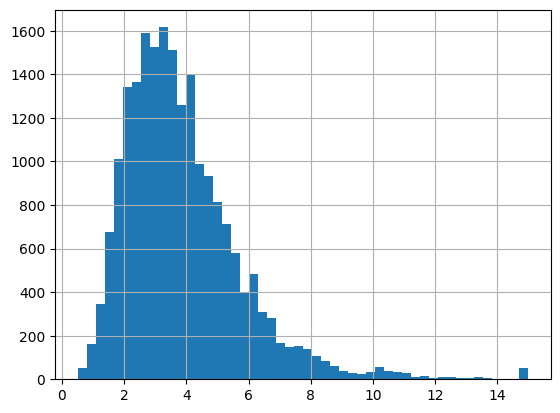

In [28]:
df['median_income'].hist(bins=50)
plt.show()

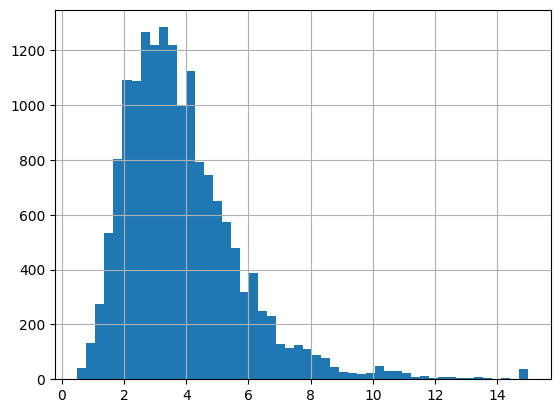

In [29]:
housing_num['median_income'].hist(bins=50)
plt.show()

In [30]:
housing_num.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        169
population              0
households              0
median_income           0
dtype: int64

In [33]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
X=imputer.fit_transform(housing_num)
# X ni dfga aylantiramiz
housing_num2=pd.DataFrame(X, index=housing_num.index, columns=housing_num.columns)

In [35]:
housing_num2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [36]:
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16343.000000,16512.000000,16512.000000,16512.000000
mean,-119.570023,35.629007,28.676599,2641.956940,538.996879,1431.722808,500.253210,3.870034
std,2.004249,2.134477,12.573315,2191.428585,421.820717,1142.565339,381.107244,1.894262
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1453.000000,297.000000,788.000000,281.000000,2.562500
50%,-118.490000,34.250000,29.000000,2127.000000,433.000000,1166.000000,409.000000,3.537700
75%,-118.010000,37.710000,37.000000,3145.250000,647.500000,1727.000000,606.000000,4.750000
max,-114.470000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100


In [37]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16908,-122.37,37.58,34.0,2697.0,313.0,810.0,279.0,12.4291
634,-122.16,37.71,37.0,1507.0,242.0,632.0,253.0,4.5553
10909,-117.86,33.74,32.0,691.0,151.0,926.0,148.0,4.1250
3736,-118.40,34.18,32.0,3724.0,899.0,1912.0,791.0,3.5711
14749,-117.05,32.57,22.0,2857.0,516.0,2412.0,496.0,4.7337
